In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install pyreadstat
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pyreadstat
import scipy.stats as stats
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.7 MB/s eta 0:00:00
/kaggle/input/breast-cancer-survival/Breast cancer survival.sav


In [2]:
sav_file = "/kaggle/input/breast-cancer-survival/Breast cancer survival.sav"

df, meta = pyreadstat.read_sav(sav_file)
df


variable_labels = meta.column_labels 
variable_labels = meta.column_names_to_labels



value_labels = meta.variable_value_labels




In [3]:
df.info()
df.describe()

variables_to_convert = ['histgrad' , 'er', 'pr', 'status']

for column in variables_to_convert:
    df[column] = df[column].astype(str).replace('nan', np.nan)

df.info()

categorical_var = ['histgrad' , 'er', 'pr', 'status']


continuous_var = ['age', 'pathsize', 'lnpos', 'time']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1207 non-null   float64
 1   age       1207 non-null   float64
 2   pathsize  1121 non-null   float64
 3   lnpos     1207 non-null   float64
 4   histgrad  920 non-null    float64
 5   er        869 non-null    float64
 6   pr        851 non-null    float64
 7   status    1207 non-null   float64
 8   time      1207 non-null   float64
dtypes: float64(9)
memory usage: 85.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1207 non-null   float64
 1   age       1207 non-null   float64
 2   pathsize  1121 non-null   float64
 3   lnpos     1207 non-null   float64
 4   histgrad  920 non-null    object 
 5   er        869 non-null    object 
 6   p

In [4]:
def frequency_table(variable):
    
    unique_elements, counts = np.unique(variable.dropna(), return_counts=True)

    percentages = (counts / len(variable))  * 100
    
    value_counts_and_percentages = zip(unique_elements, counts, percentages)

    for i, j, k in value_counts_and_percentages:
        print(f"{i}: Count:  {j}, Percentage: {k:.2f}%")

    return


for var in categorical_var:
    print (f"frequency table for  {var}")
    frequency_table(df[var])
    print("Mode =", df[var].mode())
    print("#"*50)

frequency table for  histgrad
1.0: Count:  79, Percentage: 6.55%
2.0: Count:  514, Percentage: 42.58%
3.0: Count:  327, Percentage: 27.09%
Mode = 0    2.0
Name: histgrad, dtype: object
##################################################
frequency table for  er
0.0: Count:  338, Percentage: 28.00%
1.0: Count:  531, Percentage: 43.99%
Mode = 0    1.0
Name: er, dtype: object
##################################################
frequency table for  pr
0.0: Count:  389, Percentage: 32.23%
1.0: Count:  462, Percentage: 38.28%
Mode = 0    1.0
Name: pr, dtype: object
##################################################
frequency table for  status
0.0: Count:  1135, Percentage: 94.03%
1.0: Count:  72, Percentage: 5.97%
Mode = 0    0.0
Name: status, dtype: object
##################################################


In [5]:
df[continuous_var].describe()


df[continuous_var].skew()
df[continuous_var].kurtosis()


concatenated_series = pd.concat([df[continuous_var].describe().T, df[continuous_var].skew()], axis=1)
concatenated_series = pd.concat([df[continuous_var].describe().T, df[continuous_var].skew().rename('skewness')], axis=1)


concatenated_series = pd.concat([
    df[continuous_var].describe().T,
    df[continuous_var].skew().rename('skewness'),
    df[continuous_var].kurtosis().rename('kurtosis')

], axis=1)

print(concatenated_series)

print('#'*50)

df['lnpos'].quantile(0.9)

           count       mean        std        min    25%        50%  \
age       1207.0  56.387738  13.327627  22.000000  46.00  56.000000   
pathsize  1121.0   1.733488   0.995857   0.100000   1.00   1.500000   
lnpos     1207.0   0.880696   2.535457   0.000000   0.00   0.000000   
time      1207.0  46.956476  29.638977   2.633333  22.55  42.966667   

                75%    max  skewness   kurtosis  
age       66.500000   88.0  0.049489  -0.765026  
pathsize   2.200000    7.0  1.340715   2.659314  
lnpos      0.000000   35.0  5.346459  43.047260  
time      65.583333  133.8  0.630557  -0.239387  
##################################################


np.float64(3.0)

In [6]:
confidence_level = 0.95 

for var in continuous_var:
    values = df[var].dropna()
    mean = values.mean()
    std_error = stats.sem(values)
    if std_error != 0:
        lower, upper = stats.t.interval(confidence_level, len(values) - 1, loc=mean, scale=std_error)
    else:
        lower, upper = mean, mean


    concatenated_series.loc[var, 'lower_ci'] = lower
    concatenated_series.loc[var, 'upper_ci'] = upper
print(concatenated_series)

           count       mean        std        min    25%        50%  \
age       1207.0  56.387738  13.327627  22.000000  46.00  56.000000   
pathsize  1121.0   1.733488   0.995857   0.100000   1.00   1.500000   
lnpos     1207.0   0.880696   2.535457   0.000000   0.00   0.000000   
time      1207.0  46.956476  29.638977   2.633333  22.55  42.966667   

                75%    max  skewness   kurtosis   lower_ci   upper_ci  
age       66.500000   88.0  0.049489  -0.765026  55.635105  57.140371  
pathsize   2.200000    7.0  1.340715   2.659314   1.675128   1.791847  
lnpos      0.000000   35.0  5.346459  43.047260   0.737514   1.023877  
time      65.583333  133.8  0.630557  -0.239387  45.282714  48.630238  


Text(0.5, 1.0, 'Histogram for pathsize')

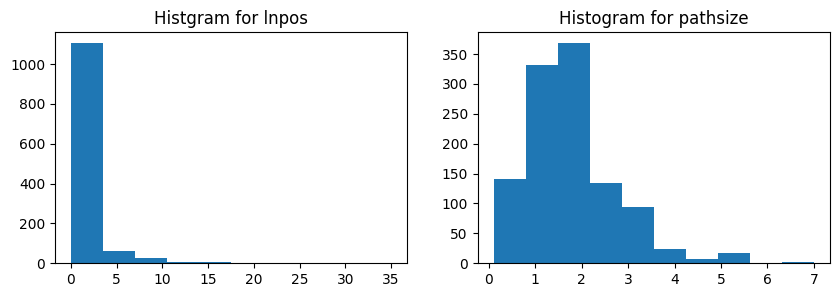

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax[0].hist(df['lnpos'])


ax[0].set_title('Histgram for lnpos')


ax[1].hist(df['pathsize'])

ax[1].set_title('Histogram for pathsize')



In [8]:
bin_edges = [-float('inf'), 0, float('inf')] 

bin_labels = ['NO', 'Yes']

df['lnpos_YN'] = pd.cut(df['lnpos'], bins=bin_edges, labels=bin_labels, right=True)

frequency_table(df['lnpos_YN'])

NO: Count:  929, Percentage: 76.97%
Yes: Count:  278, Percentage: 23.03%


In [9]:
bin_edges = [-float('inf'), 2, 5, float('inf')]

bin_labels = ['<= 2', '2 < <=5', '> 5']


df['pathsize_cat'] = pd.cut(df['pathsize'], bins=bin_edges, labels=bin_labels, right=True)

frequency_table(df['pathsize_cat'])

df.info()

2 < <=5: Count:  283, Percentage: 23.45%
<= 2: Count:  826, Percentage: 68.43%
> 5: Count:  12, Percentage: 0.99%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            1207 non-null   float64 
 1   age           1207 non-null   float64 
 2   pathsize      1121 non-null   float64 
 3   lnpos         1207 non-null   float64 
 4   histgrad      920 non-null    object  
 5   er            869 non-null    object  
 6   pr            851 non-null    object  
 7   status        1207 non-null   object  
 8   time          1207 non-null   float64 
 9   lnpos_YN      1207 non-null   category
 10  pathsize_cat  1121 non-null   category
dtypes: category(2), float64(5), object(4)
memory usage: 87.6+ KB


In [10]:
cross_tab = pd.crosstab(df['lnpos_YN'], df['status'], normalize='index')
cross_tab = pd.crosstab(df['pathsize_cat'], df['status'], normalize='index') #normalize: false/index/columns/all


cross_tab

status,0.0,1.0
pathsize_cat,,
<= 2,0.962470,0.037530
2 < <=5,0.883392,0.116608
> 5,0.833333,0.166667


In [11]:
pivot_table = df.pivot_table(values='time', index='lnpos_YN', aggfunc='mean')

pivot_table = df.pivot_table(values='time', index='lnpos_YN', aggfunc=['mean', 'std'])

pivot_table = df.pivot_table(values=['time', 'age'], index='lnpos_YN', aggfunc={'time':['mean', 'std'],
                                                                               'age' :['min', 'max']})

pivot_table = df.pivot_table(values=['time'], index=['pathsize_cat', 'lnpos_YN'], aggfunc=['mean', 'std'])


pivot_table

/tmp/ipykernel_17/2888052170.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='time', index='lnpos_YN', aggfunc='mean')
/tmp/ipykernel_17/2888052170.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='time', index='lnpos_YN', aggfunc=['mean', 'std'])
/tmp/ipykernel_17/2888052170.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='time', index='lnpos_YN', aggfunc=['mean', 'std'])
/tmp/ipykerne

mean        std
                            time       time
pathsize_cat lnpos_YN                      
<= 2         NO        47.057558  28.835447
             Yes       50.129167  31.580492
2 < <=5      NO        46.315263  29.784837
             Yes       36.823297  26.825617
> 5          NO        31.808333  16.465663
             Yes       35.616667  22.173851

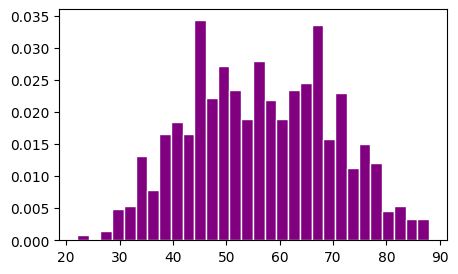

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

ax.hist(df.age, bins=30, density=1, edgecolor="white", color="purple")

plt.show()

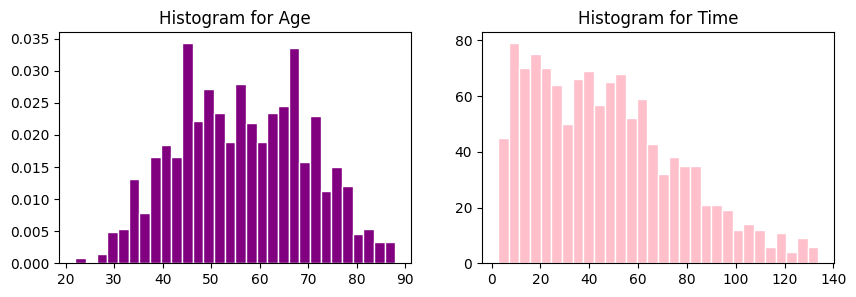

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))


ax[0].hist(df.age, bins=30, density=1, edgecolor="white", color="purple")
ax[0].set_title('Histogram for Age')


ax[1].hist(df.time, bins=30,density=0, edgecolor="white", color="pink")
ax[1].set_title('Histogram for Time')

plt.show()

/tmp/ipykernel_17/4059990733.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


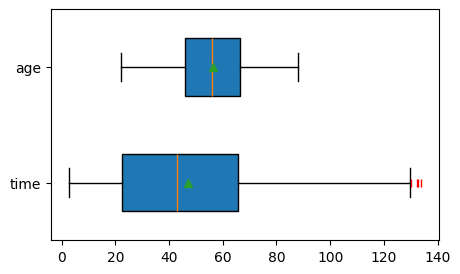

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))


ax.boxplot(
    x=[df.time,df.age],
    vert=False,
    patch_artist=True,
    widths=0.5,
    sym='r|',
    labels=['time', 'age'],
    showmeans=True,
    showfliers=True,
)

plt.show()

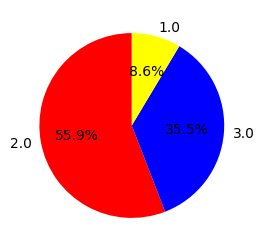

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))



histgrad_counts = df['histgrad'].dropna().value_counts()


ax.pie(histgrad_counts, labels=histgrad_counts.index, autopct='%.1f%%', startangle=90, colors=['red', 'blue', 'yellow'],)




plt.show()

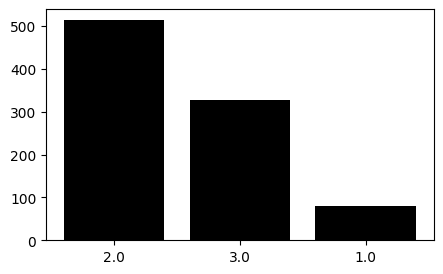

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))



histgrad_counts = df['histgrad'].dropna().value_counts()


ax.bar(histgrad_counts.index, height=histgrad_counts, color="black")


plt.show()

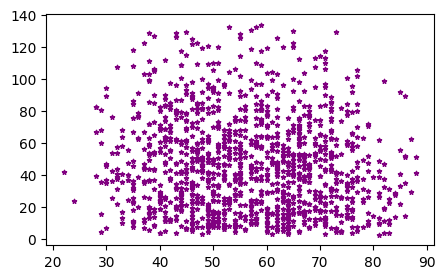

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))


ax.scatter(df.age, df.time, marker='*', s=10, c='purple')

plt.show()

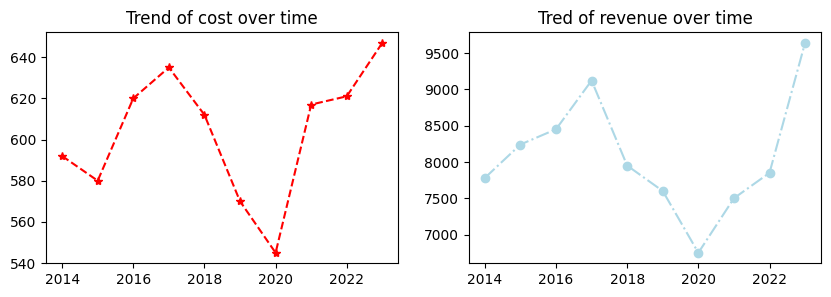

In [18]:
year = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022, 2023]
cost = [592, 580, 620, 635, 612, 570, 545, 617, 621, 647]
revenue = [7780, 8240, 8450, 9120, 7950, 7600, 6750, 7500,7850, 9640]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))


ax[0].plot(year, cost, marker='*', linestyle='--',color='red')
ax[0].set_title('Trend of cost over time')

ax[1].plot(year, revenue, marker='o', linestyle='-.', color='lightblue')
ax[1].set_title('Tred of revenue over time')

plt.show()